<a href="https://colab.research.google.com/github/hemangi2204/Data_science/blob/main/Copy_of_Case_Studt_2_Bank_cvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np
# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing Data Using Pandas Function

df = pd.read_csv('bank.csv',sep =',')
# Shuffle 100 % Dataset
df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3916,38,entrepreneur,married,tertiary,no,0,yes,no,cellular,18,nov,185,3,-1,0,unknown,no
3245,39,admin.,single,tertiary,no,2600,yes,no,unknown,17,jun,77,1,-1,0,unknown,no
729,47,management,single,tertiary,no,153,yes,no,cellular,18,nov,192,2,-1,0,unknown,no
314,25,admin.,single,tertiary,no,760,yes,no,cellular,27,may,223,3,89,2,failure,yes
4400,48,admin.,married,secondary,no,5,yes,no,unknown,7,may,697,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
568,59,unemployed,married,primary,no,0,no,no,cellular,30,jan,3025,2,-1,0,unknown,no
1004,24,blue-collar,married,secondary,no,204,yes,yes,cellular,17,apr,229,3,-1,0,unknown,no
682,37,self-employed,married,secondary,no,4153,yes,no,cellular,31,jul,35,16,-1,0,unknown,no


In [ ]:
# Problem Definition:
'''
This Dataset belong to Portugal Bank Telemarketing. Where our aim isn to predict
whether the client will subscribe a term deposit or not.Hence 'y' will be act as
target column or dependent column whereas other columns are independent columns.

x = independent columns
y = dependent column/ target column
'''

# checking dataset information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


'\nThe following Graph Shows, we dont have any missing values present in any of the\ncolumn\n'

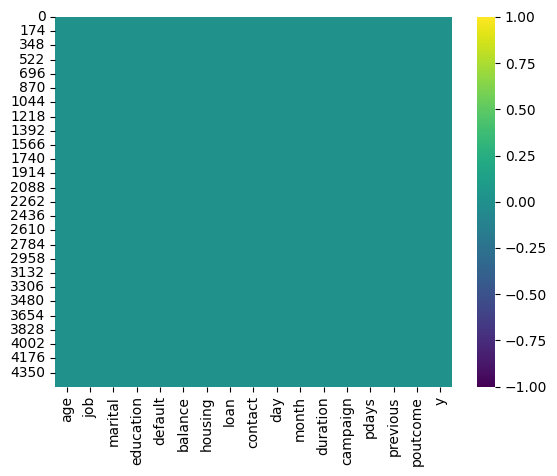

In [ ]:
# Checking Null values Present in Dataset:
#df.isnull().sum()
sns.heatmap(df.isnull(),cmap = 'viridis',vmin = -1,vmax = 1,center =0)

'''
The following Graph Shows, we dont have any missing values present in any of the
column
'''

<Axes: >

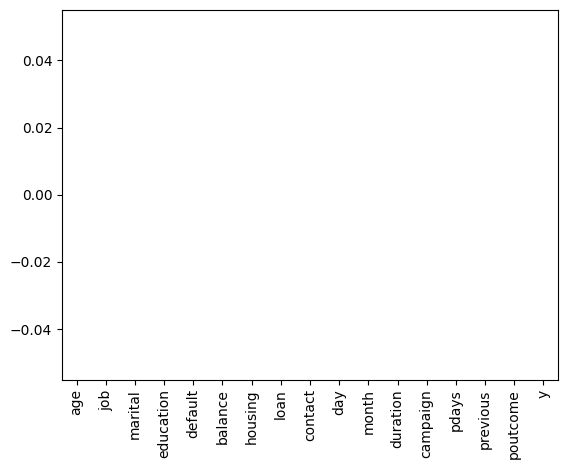

In [ ]:
df.isnull().sum().plot(kind = 'bar',cmap = 'viridis')

In [ ]:
# Split the Dataset into Categorical and Numerical

categorical_col = df.select_dtypes(include = 'object')
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [ ]:
numerical_col = df.select_dtypes(exclude = 'object')
numerical_col

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


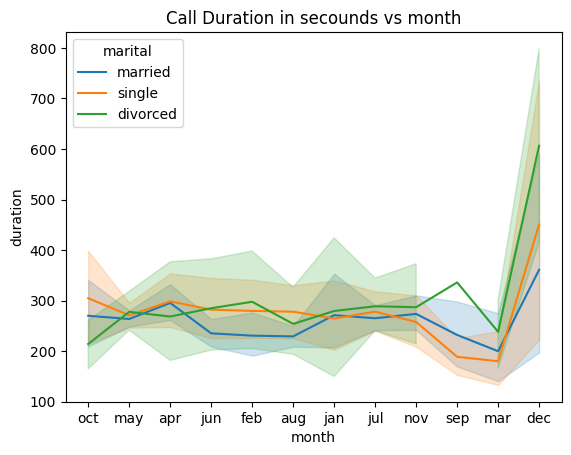

In [ ]:
sns.lineplot(x = df['month'],y = df['duration'],c = 'red',hue = df['marital'])
plt.title('Call Duration in secounds vs month')
plt.show()

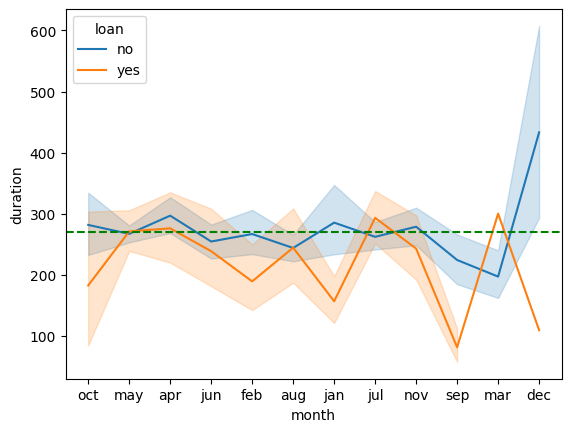

In [ ]:
sns.lineplot(x = df['month'],y = df['duration'],hue = df['loan'])
plt.axhline(270,linestyle = '--',color ='green')

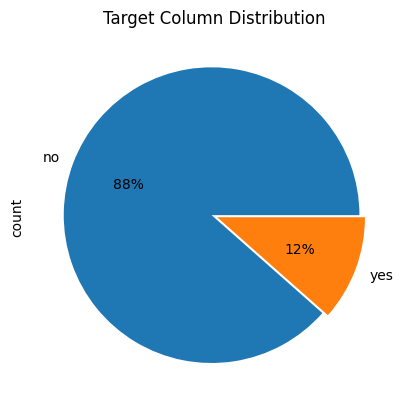

In [ ]:
df['y'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%',explode =[0.02,0.02])
plt.title('Target Column Distribution')
plt.show()

<Axes: ylabel='count'>

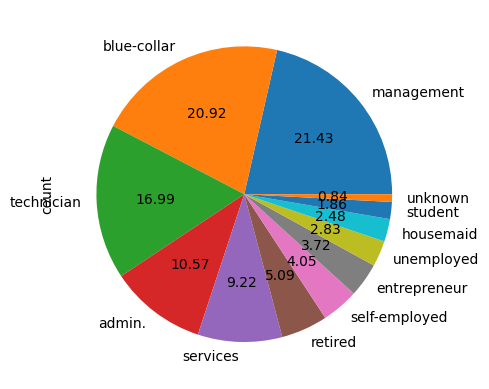

In [ ]:
df['job'].value_counts().plot(kind = 'pie',autopct = '%1.2f')

In [ ]:
management_job = df[(df['job'] == 'management') & (df['y'] == 'yes')]

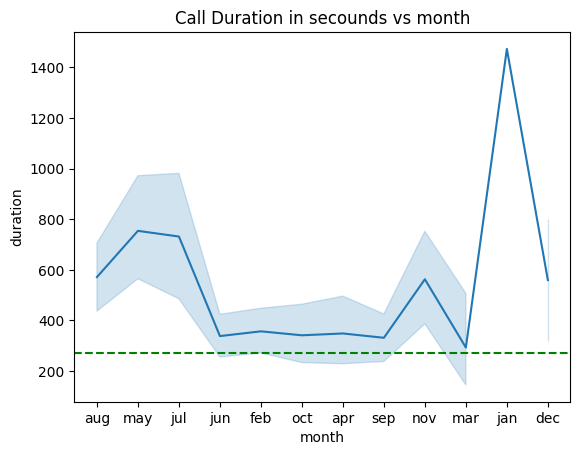

In [ ]:
sns.lineplot(x = management_job['month'],y = management_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [ ]:
admin_job = df[(df['job'] == 'admin.') & (df['y'] == 'yes')]

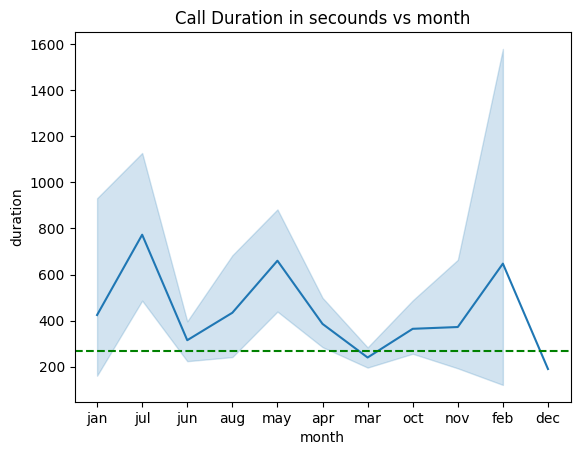

In [ ]:
sns.lineplot(x = admin_job['month'],y = admin_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [ ]:
bluecollar_job = df[(df['job'] == 'blue-collar') & (df['y'] == 'yes')]

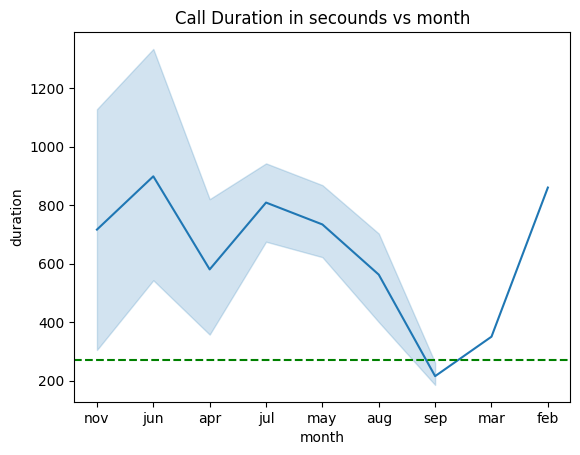

In [ ]:
sns.lineplot(x = bluecollar_job['month'],y = bluecollar_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [ ]:
services_job = df[(df['job'] == 'services') & (df['y'] == 'yes')]

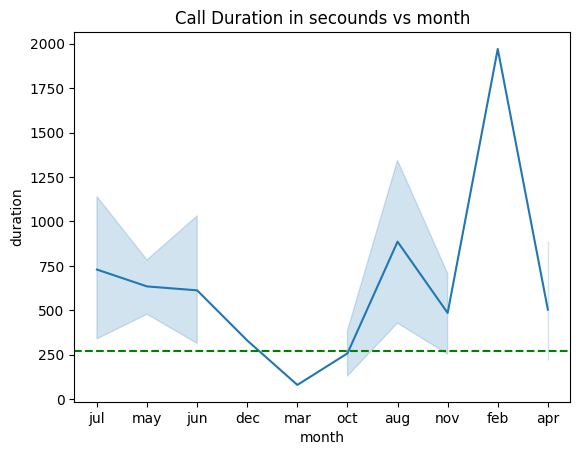

In [ ]:
sns.lineplot(x = services_job['month'],y = services_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [ ]:
technician_job = df[(df['job'] == 'technician') & (df['y'] == 'yes')]

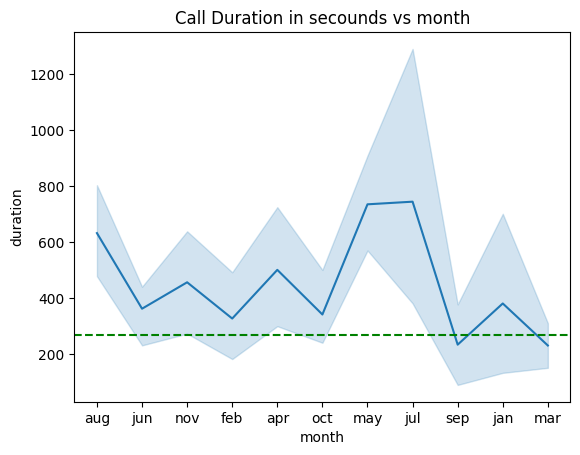

In [ ]:
sns.lineplot(x = technician_job['month'],y = technician_job['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.title('Call Duration in secounds vs month')
plt.show()

In [ ]:
df[df['job'] == 'admin.'].agg(['mode'])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode,mode
0,34.0,admin.,married,secondary,no,0.0,yes,no,cellular,20.0,may,77,1.0,-1.0,0.0,unknown,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN


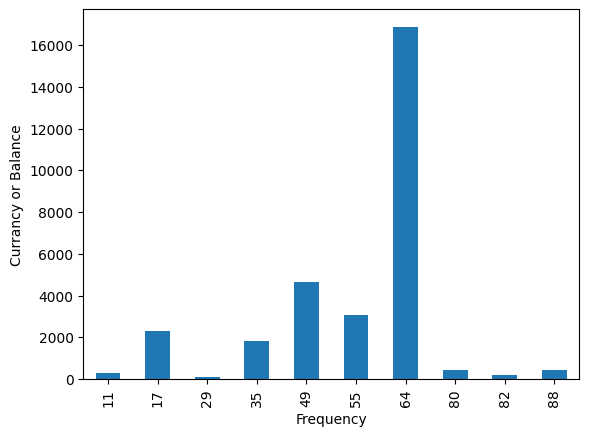

In [ ]:
df[df['job'] == 'admin.']['balance'][:10].plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

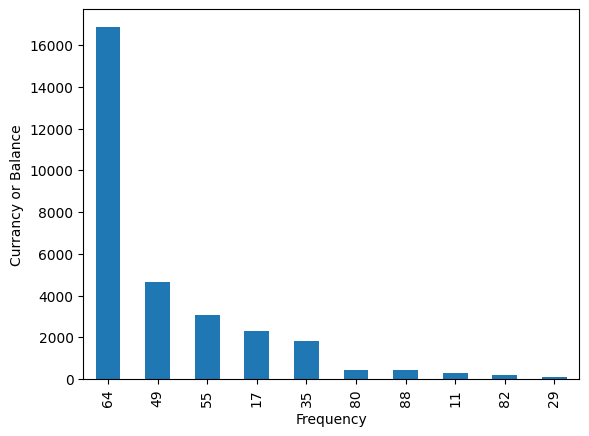

In [ ]:
df[df['job'] == 'admin.']['balance'][:10].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Frequency')
plt.ylabel('Currancy or Balance')
plt.show()

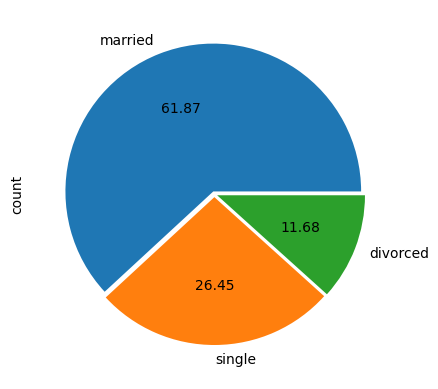

In [ ]:
df['marital'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode =[0.02,0.02,0.02])
plt.show()

In [ ]:
divorced = df[(df['marital'] == 'divorced') & (df['y'] == 'yes')]

<Axes: ylabel='count'>

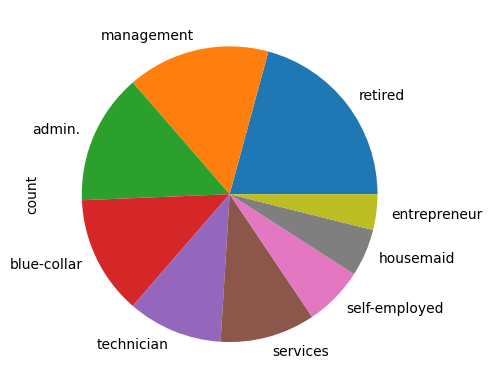

In [ ]:
divorced['job'].value_counts().plot(kind = 'pie')

In [ ]:
divorced_retired = divorced[divorced['job'] == 'retired']

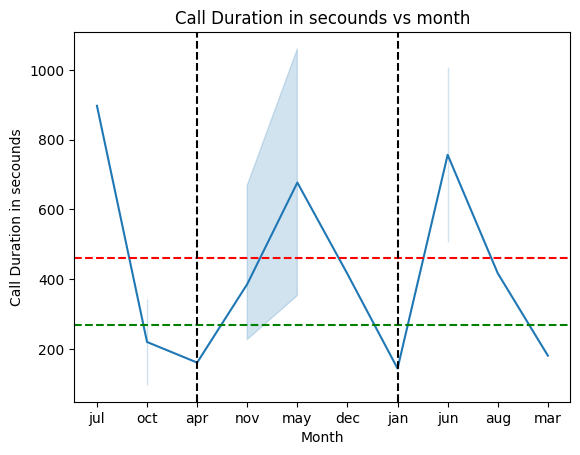

In [ ]:
sns.lineplot(x = divorced_retired['month'],y = divorced_retired['duration'])
plt.axhline(270,linestyle = '--',color ='green')
plt.axhline(divorced_retired['duration'].mean(),linestyle = '--',color ='red')
plt.xlabel('Month')
plt.ylabel('Call Duration in secounds')
plt.axvline('apr',linestyle = '--',color ='black')
plt.axvline('jan',linestyle = '--',color ='black')
plt.title('Call Duration in secounds vs month')
plt.show()